## SINDy Predator-prey

In [1]:
import numpy as np
import pysindy as ps
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [2]:
p=[1, 2, 3, 4] # Predator-prey parameters
t_start = 0
t_end = 90
num_steps = 1000

dt = (t_end-t_start)/num_steps
t_train = np.arange(t_start, t_end, dt)
x0_train = [1, 2]
t_train_span = (t_start, t_end)

# ODE
def predator_prey(t, x, p=p):
    return [p[0] * x[0] - p[1] * x[0] * x[1], p[2] * x[0] * x[1] - p[3] * x[1]]

integrator_keywords = {'method':'LSODA', 'atol':1e-10, 'rtol':1e-12}

x_train_clean = solve_ivp(predator_prey, (t_start, t_end), x0_train, t_eval=t_train, **integrator_keywords).y.T

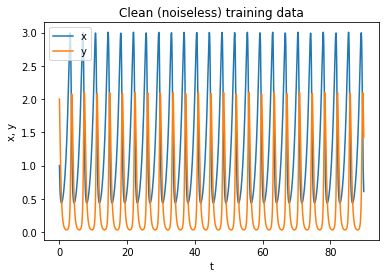

In [3]:
import matplotlib.pyplot as plt
plt.plot(t_train, x_train_clean, label=['x', 'y'])
plt.xlabel('t')
plt.ylabel('x, y')
plt.legend()
plt.title('Clean (noiseless) training data')
plt.show()

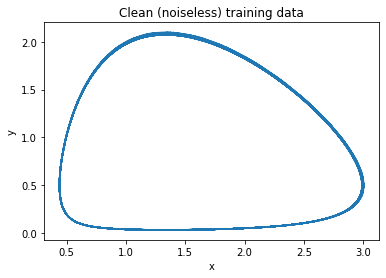

In [4]:
plt.plot(x_train_clean[:,0], x_train_clean[:,1])
plt.xlabel("x")
plt.ylabel("y")
plt.title('Clean (noiseless) training data')
plt.show()

In [5]:
def get_model():
    model = ps.SINDy(
    differentiation_method = ps.FiniteDifference(order=2),
        feature_library = ps.PolynomialLibrary(degree=3),
        optimizer = ps.STLSQ(threshold=0.2),
        feature_names=["x", "y"]
    )
    return(model)

In [6]:
model_clean = get_model()
fitted_model_clean = model_clean.fit(x_train_clean, t=dt)
fitted_model_clean.print()

(x)' = 0.983 x + -1.965 x y
(y)' = -3.893 y + 2.919 x y


In [7]:
x0_test = [1, 1.5]
t_test = t_train
t_test_span = t_train_span
x_test_clean = solve_ivp(predator_prey, t_test_span, x0_test, t_eval=t_test, **integrator_keywords).y.T

sim_clean = fitted_model_clean.simulate(x0_test, t=t_test)

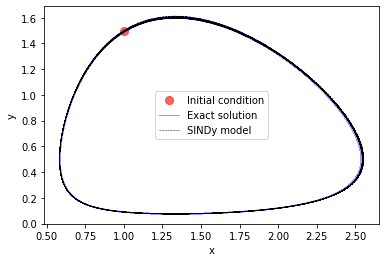

In [8]:
plt.figure()
plt.plot(x0_test[0], x0_test[1], "ro", label="Initial condition", alpha=0.6, markersize=8)
plt.plot(x_test_clean[:,0], x_test_clean[:,1], "b", label="Exact solution", alpha=0.4, linewidth=1)
plt.plot(sim_clean[:, 0], sim_clean[:, 1], "k--", label="SINDy model", linewidth=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [9]:
def noisify(x, sd):
    norm_sigma = np.sqrt(np.log(1+sd**2))
    norm_mu = -norm_sigma**2/2
    return(np.multiply(np.random.lognormal(norm_mu, norm_sigma, [len(x),2]), x))

In [20]:
sd = 0.02
x_train_noisy = noisify(x_train_clean, sd)
model_noisy = get_model()
fitted_model_noisy = model_noisy.fit(x_train_noisy, t=dt)
fitted_model_noisy.print()

(x)' = 1.049 x + 0.717 y + -4.228 x y + 0.532 x^2 y + 0.455 x y^2
(y)' = -3.876 y + 2.892 x y


In [21]:
fitted_model_clean.print()

(x)' = 0.983 x + -1.965 x y
(y)' = -3.893 y + 2.919 x y


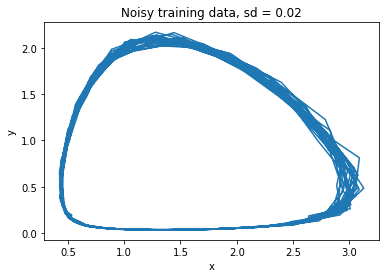

In [22]:
plt.plot(x_train_noisy[:,0], x_train_noisy[:,1])
plt.xlabel("x")
plt.ylabel("y")
plt.title(f'Noisy training data, sd = {sd}')
plt.show()

In [23]:
sim_noisy = fitted_model_noisy.simulate(x0_test, t=t_test)
x_test_noisy = solve_ivp(predator_prey, t_test_span, x0_test, t_eval=t_test, **integrator_keywords).y.T

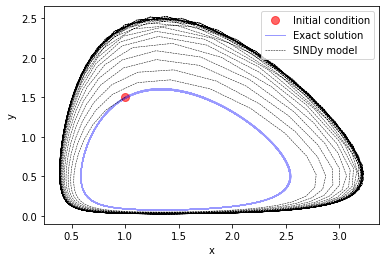

In [24]:
plt.figure()
plt.plot(x0_test[0], x0_test[1], "ro", label="Initial condition", alpha=0.6, markersize=8)
plt.plot(x_test_noisy[:,0], x_test_noisy[:,1], "b", label="Exact solution", alpha=0.4, linewidth=1)
plt.plot(sim_noisy[:, 0], sim_noisy[:, 1], "k--", label="SINDy model", linewidth=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()